In [50]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# COCO

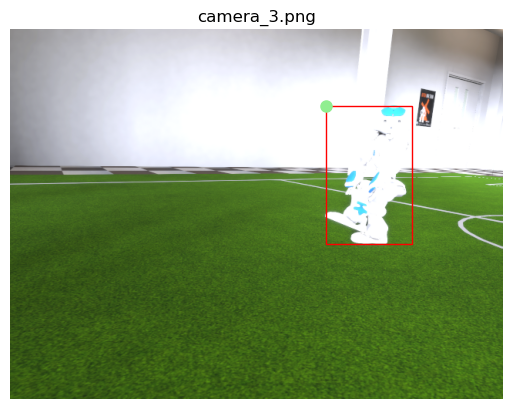

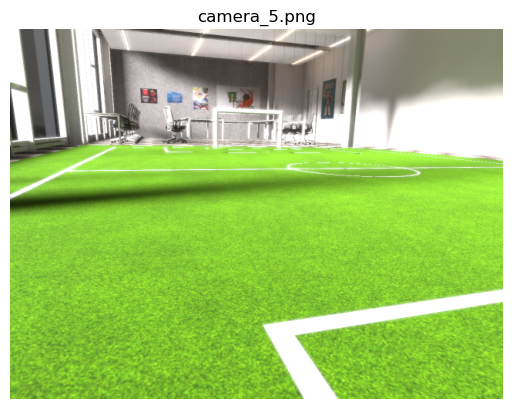

In [51]:
def visualize_bounding_boxes_coco(json_file_path, image_dir_path, image_ids):
    with open(json_file_path, 'r') as json_file:
        data = json.load(json_file)

    for image_info in data['images']:
        image_id = image_info['id']
        if image_id not in image_ids:
            continue

        image_file_name = image_info['file_name']
        image_path = os.path.join(image_dir_path, image_file_name)

        image = Image.open(image_path)
        plt.imshow(image)

        for annotation in data['annotations']:
            if annotation['image_id'] == image_id:
                bbox = annotation['bbox']
                x, y, w, h = bbox
                rectangle = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
                plt.gca().add_patch(rectangle)
                
                # Calculate center coordinates
                center_x = x
                center_y = y

                # Add center dot
                plt.plot(center_x, center_y, 'o', markersize=8, color='lightgreen')

        plt.title(image_file_name)
        plt.axis('off')
        plt.show()

# Example usage:
json_file_path = 'data/coco_nao/bbox.json'
image_dir_path = 'data/coco_nao/images'
image_ids = [3, 5]  # List of image IDs to visualize

visualize_bounding_boxes_coco(json_file_path, image_dir_path, image_ids)


# YOLO

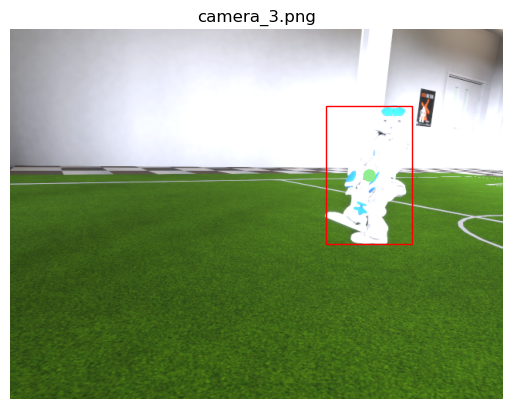

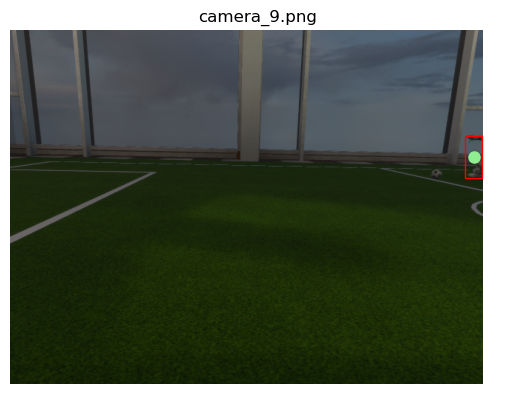

In [52]:
def visualize_bounding_boxes_yolo(image_ids, image_dir_path, yolo_txt_dir):
    for image_id in image_ids:
        image_file_name = f"camera_{image_id}.png"
        image_path = os.path.join(image_dir_path, image_file_name)
        yolo_txt_file = f"camera_{image_id}.txt"
        yolo_txt_path = os.path.join(yolo_txt_dir, yolo_txt_file)

        image = Image.open(image_path)
        plt.imshow(image)

        with open(yolo_txt_path, 'r') as txt_file:
            lines = txt_file.readlines()

        for line in lines:
            bbox = line.split()
            bbox = [float(value) for value in bbox]  # Convert bbox values to float
            id, x_center, y_center, width, height = bbox
            x = (x_center - width / 2) * image.width
            y = (y_center - height / 2) * image.height
            w = width * image.width
            h = height * image.height

            rectangle = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
            plt.gca().add_patch(rectangle)

            plt.plot(x_center * image.width, y_center * image.height, 'o', markersize=8, color='lightgreen')

        plt.title(image_file_name)
        plt.axis('off')
        plt.show()


# Example usage:
image_ids = [3, 9]  # Image ID to visualize
image_dir_path = 'data/coco_nao/filtered_images'
yolo_txt_dir = 'data/coco_nao/labels'

visualize_bounding_boxes_yolo(image_ids, image_dir_path, yolo_txt_dir)
